In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import glob
import matplotlib.pyplot as plt
from scipy.stats import ranksums

import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import glob
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from scipy.stats import skew
from scipy.stats import kurtosis, skew
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import numpy as np
from sklearn import metrics
import sklearn




In [41]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
    

def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [42]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected


def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [44]:
def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

In [45]:
path_align_german = '/export/b15/afavaro/Frontiers/German_PD/Alignment_German'
paths= [os.path.join(path_align_german, base) for base in os.listdir(path_align_german)]
len(paths)
paths

['/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_137_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_171_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_133_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_095_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_091_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_097_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_160_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_104_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_164_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignment_German/CN_096_concatenateread_German.csv',
 '/export/b15/afavaro/Frontiers/German_PD/Alignmen

In [46]:
list_of_dataframes = []
for element in paths:
    participant = pd.read_csv(element)
    elem = os.path.basename(element)
    
    name = elem.split("_", 2)[1]
    label = elem.split("_")[0]
    task = (elem.split("_", 2)[-1].split('.csv')[0])
    
    tot= participant.time_stamp.tolist()
    tot = (list(set(tot)))
    unique = participant['time_stamp'].unique()
    stdx = unique.std()
    kurtx = kurtosis(unique)
    skewx =  skew(unique)

    dict = {'name': name, 'label': label, 'tasks': task,   'rhythm_std': stdx,'rhythm_skew': skewx, 'rhythm_kurt': kurtx } # 'Rhythm_kurt': kurtosis, 
    df = pd.DataFrame(dict, index=[0])
    list_of_dataframes.append(df)

data = pd.concat(list_of_dataframes, ignore_index=True)
data = data.dropna()
data

,name,label,tasks,rhythm_std,rhythm_skew,rhythm_kurt
0,137,CN,concatenateread_German,4.488841,0.288162,-0.340355
1,171,CN,concatenateread_German,4.088579,0.332808,-0.634830
2,133,CN,concatenateread_German,3.628017,-0.503653,-0.277443
3,095,CN,concatenateread_German,4.198470,0.075497,-0.337018
4,091,CN,concatenateread_German,5.438679,0.025733,-1.371423
...,...,...,...,...,...,...
523,084,PD,readtext_German,13.096375,0.148182,-1.237497
524,085,PD,readtext_German,17.108591,-0.315606,-1.113362
525,086,PD,readtext_German,15.355324,0.055762,-1.264192
526,087,PD,readtext_German,19.464469,0.221889,-1.406450


In [17]:
#data.to_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GERMAN/COGNITIVE/RHYTHM.csv")

In [28]:
task = data.groupby('tasks')
monolo = task.get_group('monologue_German')
cocnc =  task.get_group('concatenateread_German')
read = task.get_group('readtext_German')

## Monologue

In [47]:
grouped = monolo.groupby("label") #here we extract the values by category

control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = monolo.columns[-3:-2].values.tolist()


parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monolo.columns[-3:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(monolo.columns[-3:-2])])

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_mon.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    
kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_mon.txt')
holm_correction(kruskal_1)

(['kruskal results for rhythm_std controls vs. parkinson 9.747574354863798e-05 '],
 [9.747574354863798e-05])

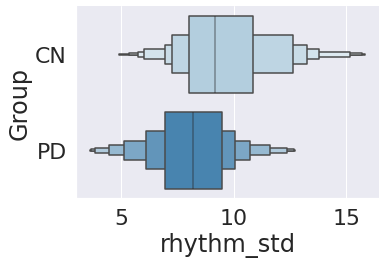

In [48]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/SS_{nome}.png', facecolor='white', dpi=600)

##  Read passage 

In [37]:
grouped = read.groupby("label") #here we extract the values by category

control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = read.columns[-3:].values.tolist()
task


parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(read.columns[-3:])])
control_all_feat = np.array([control[feat] for feat in np.array(read.columns[-3:])])

#data = [alzheimer_all_feat, others_all_feat, parkinson_all_feat, control_all_feat, ataxia_all_feat]

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_read.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_rt_read.txt')
holm_correction(kruskal_1)

([], [])

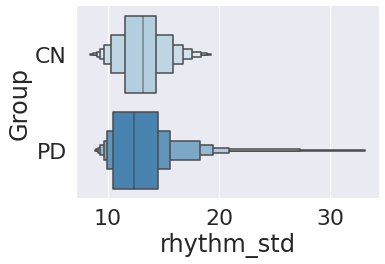

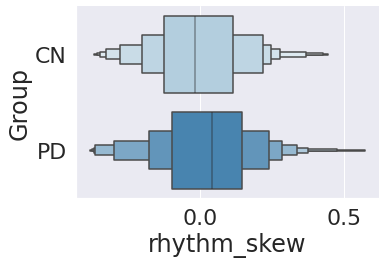

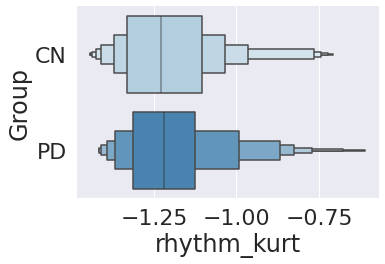

In [38]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_plot_SLT/{nome}', facecolor='white', dpi=600)

## Text Dependent Utterances (TDU)

In [39]:
grouped = cocnc.groupby("label") #here we extract the values by category

control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = cocnc.columns[-3:].values.tolist()



parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(cocnc.columns[-3:])])
control_all_feat = np.array([control[feat] for feat in np.array(cocnc.columns[-3:])])

#data = [alzheimer_all_feat, others_all_feat, parkinson_all_feat, control_all_feat, ataxia_all_feat]

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_conc.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/COGNITIVE/Results/rhythm_conc.txt')
holm_correction(kruskal_1)

([], [])

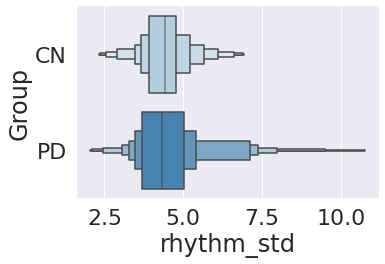

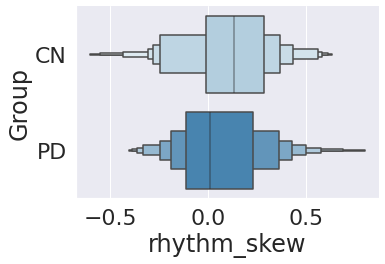

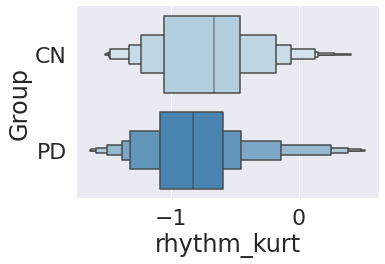

In [40]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b14/afavaro/SLT_submission/Final_plot_SLT/{nome}', facecolor='white', dpi=600)